In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from dysts.flows import Lorenz, Hadley

## Load and simulate an attractor
model = Lorenz()
sol = model.make_trajectory(1000, resample=True,noise=0.01)
plt.figure()
plt.plot(sol[:, 0], sol[:, 1])

sol2 = model.make_trajectory(1000, resample=True,noise=0.01)

plt.plot(sol2[:, 0], sol2[:, 1])

: 

Let's build some minimal models of transformer self-attention, mamba, and s4d and apply them to this data (for now, untrained)

In [5]:
import sys
import torch
sys.path.append("/om2/user/ostrow/NN_delay_embeddings/nn_delay_embeddings")
from models.transformers import minimalGPT

In [4]:
model = minimalGPT(1,100,1,1000)

In [6]:
data = torch.tensor(sol[np.newaxis,:,0:1]).float()
print(data.size())
out,hidden = model(data)
hidden = hidden.detach().numpy().squeeze()
out.shape,hidden.shape

NameError: name 'sol' is not defined

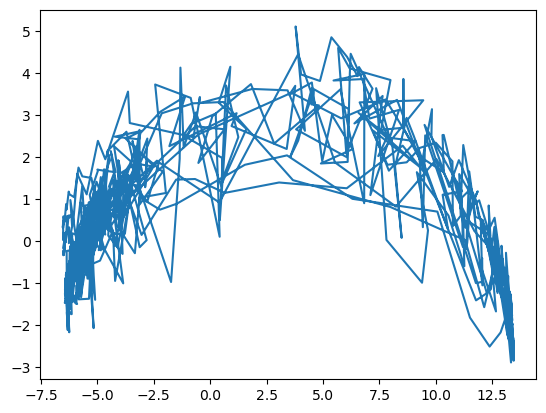

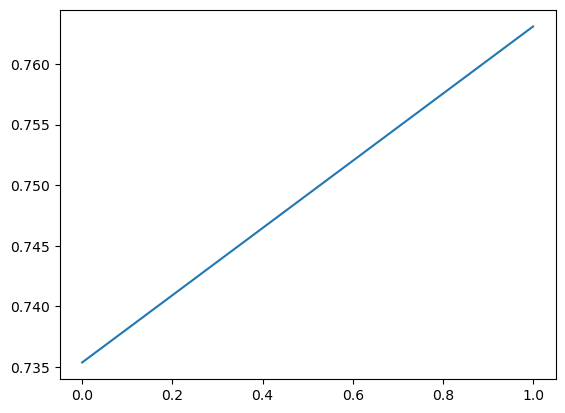

In [6]:
#run pca on the hidden states
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(hidden)
hidden_pca = pca.transform(hidden)
plt.figure()
plt.plot(hidden_pca[:,0],hidden_pca[:,1])
plt.figure()
#plot evr
plt.plot(np.cumsum(pca.explained_variance_ratio_))

Cool -- so this shows that an untrained transformer, although it receives a delay embedding, does not actually (at initialization) reconstruct the attractor

(20, 1000, 3) torch.Size([20, 1000, 1])
(20, 1000, 3) torch.Size([20, 1000, 1])


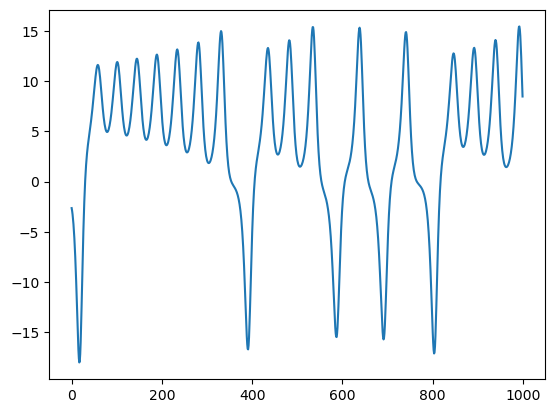

In [36]:
#convert these into dataloaders
from utils import make_dataset

train_loader, val_loader, train_data, val_data = make_dataset(Lorenz,1000,20)
plt.figure()
plt.plot(train_data[0,:1000,0])

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0 Training Loss: 23.25446500778198


  2%|▏         | 1/50 [00:04<03:50,  4.71s/it]

Epoch 0 Validation Loss: 11.360603737831116
Epoch 1 Training Loss: 7.2017369389534


  4%|▍         | 2/50 [00:10<04:16,  5.34s/it]

Epoch 1 Validation Loss: 3.7333660244941713
Epoch 2 Training Loss: 2.68844997882843


  6%|▌         | 3/50 [00:15<04:10,  5.32s/it]

Epoch 2 Validation Loss: 2.264588141441345
Epoch 3 Training Loss: 2.2990786373615264


  8%|▊         | 4/50 [00:21<04:08,  5.41s/it]

Epoch 3 Validation Loss: 1.619488388299942
Epoch 4 Training Loss: 1.4678710877895356


 10%|█         | 5/50 [00:25<03:50,  5.13s/it]

Epoch 4 Validation Loss: 1.381935054063797
Epoch 5 Training Loss: 1.150891363620758


 12%|█▏        | 6/50 [00:31<03:49,  5.21s/it]

Epoch 5 Validation Loss: 1.1509198278188706
Epoch 6 Training Loss: 1.042463916540146


 14%|█▍        | 7/50 [00:36<03:46,  5.28s/it]

Epoch 6 Validation Loss: 1.0009071379899979
Epoch 7 Training Loss: 1.0399381011724471


 16%|█▌        | 8/50 [00:42<03:44,  5.34s/it]

Epoch 7 Validation Loss: 1.1563413888216019
Epoch 8 Training Loss: 0.9355002790689468


 18%|█▊        | 9/50 [00:47<03:35,  5.25s/it]

Epoch 8 Validation Loss: 0.8610497325658798
Epoch 9 Training Loss: 0.8691920042037964


 20%|██        | 10/50 [00:53<03:35,  5.39s/it]

Epoch 9 Validation Loss: 0.936505350470543
Epoch 10 Training Loss: 1.0556698054075242


 22%|██▏       | 11/50 [00:57<03:22,  5.20s/it]

Epoch 10 Validation Loss: 1.8403628408908843
Epoch 11 Training Loss: 1.3323240786790849


 24%|██▍       | 12/50 [01:03<03:24,  5.38s/it]

Epoch 11 Validation Loss: 1.1781048148870468
Epoch 12 Training Loss: 0.956767201423645


 26%|██▌       | 13/50 [01:08<03:14,  5.24s/it]

Epoch 12 Validation Loss: 0.9892321974039078
Epoch 13 Training Loss: 0.8690510243177414


 28%|██▊       | 14/50 [01:13<03:11,  5.32s/it]

Epoch 13 Validation Loss: 0.8175324112176895
Epoch 14 Training Loss: 0.7418106168508529


 30%|███       | 15/50 [01:19<03:05,  5.30s/it]

Epoch 14 Validation Loss: 0.6450855225324631
Epoch 15 Training Loss: 0.8111715108156204


 32%|███▏      | 16/50 [01:24<03:00,  5.30s/it]

Epoch 15 Validation Loss: 0.9716877847909927
Epoch 16 Training Loss: 0.6510332450270653


 34%|███▍      | 17/50 [01:29<02:53,  5.26s/it]

Epoch 16 Validation Loss: 0.7098029464483261
Epoch 17 Training Loss: 0.5560195416212081


 36%|███▌      | 18/50 [01:34<02:48,  5.26s/it]

Epoch 17 Validation Loss: 0.6459031432867051
Epoch 18 Training Loss: 0.5828671082854271


 38%|███▊      | 19/50 [01:39<02:39,  5.14s/it]

Epoch 18 Validation Loss: 0.8253513246774673
Epoch 19 Training Loss: 0.6335800111293792


 40%|████      | 20/50 [01:45<02:36,  5.21s/it]

Epoch 19 Validation Loss: 0.5406965434551239
Epoch 20 Training Loss: 0.5561692491173744


 42%|████▏     | 21/50 [01:50<02:28,  5.13s/it]

Epoch 20 Validation Loss: 0.6416470125317574
Epoch 21 Training Loss: 0.4877074480056763


 44%|████▍     | 22/50 [01:55<02:27,  5.27s/it]

Epoch 21 Validation Loss: 0.8520641207695008
Epoch 22 Training Loss: 0.581860214471817


 46%|████▌     | 23/50 [02:00<02:20,  5.21s/it]

Epoch 22 Validation Loss: 0.5324743866920472
Epoch 23 Training Loss: 0.5694752469658851


 48%|████▊     | 24/50 [02:06<02:16,  5.26s/it]

Epoch 23 Validation Loss: 0.8009715169668198
Epoch 24 Training Loss: 0.7442245051264763


 50%|█████     | 25/50 [02:11<02:09,  5.20s/it]

Epoch 24 Validation Loss: 1.6463284373283387
Epoch 25 Training Loss: 0.8472772657871246


 52%|█████▏    | 26/50 [02:16<02:05,  5.24s/it]

Epoch 25 Validation Loss: 1.1271016776561738
Epoch 26 Training Loss: 0.6454434394836426


 54%|█████▍    | 27/50 [02:21<01:57,  5.13s/it]

Epoch 26 Validation Loss: 0.5273664757609368
Epoch 27 Training Loss: 0.44616411030292513


 56%|█████▌    | 28/50 [02:27<01:55,  5.27s/it]

Epoch 27 Validation Loss: 0.6674942910671234
Epoch 28 Training Loss: 0.45954896211624147


 58%|█████▊    | 29/50 [02:31<01:46,  5.07s/it]

Epoch 28 Validation Loss: 0.5246141254901886
Epoch 29 Training Loss: 0.4325657919049263


 60%|██████    | 30/50 [02:37<01:43,  5.18s/it]

Epoch 29 Validation Loss: 0.4631283149123192
Epoch 30 Training Loss: 0.4428733393549919


 62%|██████▏   | 31/50 [02:42<01:37,  5.13s/it]

Epoch 30 Validation Loss: 0.5018190011382103
Epoch 31 Training Loss: 0.4032909646630287


 64%|██████▍   | 32/50 [02:47<01:35,  5.29s/it]

Epoch 31 Validation Loss: 0.46716831922531127
Epoch 32 Training Loss: 0.4724301055073738


 66%|██████▌   | 33/50 [02:52<01:28,  5.20s/it]

Epoch 32 Validation Loss: 0.5986309111118316
Epoch 33 Training Loss: 0.575401297211647


 68%|██████▊   | 34/50 [02:58<01:25,  5.32s/it]

Epoch 33 Validation Loss: 1.1692269906401633
Epoch 34 Training Loss: 0.673237743973732


 70%|███████   | 35/50 [03:03<01:18,  5.23s/it]

Epoch 34 Validation Loss: 0.9118888437747955
Epoch 35 Training Loss: 0.6352016009390354


 72%|███████▏  | 36/50 [03:08<01:14,  5.34s/it]

Epoch 35 Validation Loss: 0.5372606456279755
Epoch 36 Training Loss: 0.4156543925404549


 74%|███████▍  | 37/50 [03:13<01:08,  5.24s/it]

Epoch 36 Validation Loss: 0.4771611452102661
Epoch 37 Training Loss: 0.448472448438406


 76%|███████▌  | 38/50 [03:19<01:03,  5.33s/it]

Epoch 37 Validation Loss: 0.8840564206242562
Epoch 38 Training Loss: 0.7438535921275615


 78%|███████▊  | 39/50 [03:24<00:57,  5.24s/it]

Epoch 38 Validation Loss: 0.646265073120594
Epoch 39 Training Loss: 0.6012952417135239


 80%|████████  | 40/50 [03:30<00:53,  5.30s/it]

Epoch 39 Validation Loss: 0.7442455753684044
Epoch 40 Training Loss: 0.5037444204092025


 82%|████████▏ | 41/50 [03:34<00:46,  5.20s/it]

Epoch 40 Validation Loss: 0.6766850188374519
Epoch 41 Training Loss: 0.5482721358537674


 84%|████████▍ | 42/50 [03:40<00:41,  5.22s/it]

Epoch 41 Validation Loss: 0.731839245557785
Epoch 42 Training Loss: 0.5032541856169701


 86%|████████▌ | 43/50 [03:45<00:35,  5.11s/it]

Epoch 42 Validation Loss: 0.53007443100214
Epoch 43 Training Loss: 0.4680804140865803


 88%|████████▊ | 44/50 [03:50<00:31,  5.20s/it]

Epoch 43 Validation Loss: 0.6857345759868622
Epoch 44 Training Loss: 0.5397124513983727


 90%|█████████ | 45/50 [03:55<00:25,  5.16s/it]

Epoch 44 Validation Loss: 0.46360662057995794
Epoch 45 Training Loss: 0.44799316823482516


 92%|█████████▏| 46/50 [04:01<00:21,  5.32s/it]

Epoch 45 Validation Loss: 0.6347395420074463
Epoch 46 Training Loss: 0.655888544023037


 94%|█████████▍| 47/50 [04:06<00:15,  5.31s/it]

Epoch 46 Validation Loss: 0.5670909404754638
Epoch 47 Training Loss: 0.41579198837280273


 96%|█████████▌| 48/50 [04:11<00:10,  5.26s/it]

Epoch 47 Validation Loss: 0.4588709108531475
Epoch 48 Training Loss: 0.33394131511449815


 98%|█████████▊| 49/50 [04:16<00:05,  5.25s/it]

Epoch 48 Validation Loss: 0.41098222956061364
Epoch 49 Training Loss: 0.337086134403944


100%|██████████| 50/50 [04:22<00:00,  5.24s/it]

Epoch 49 Validation Loss: 0.5344273060560226


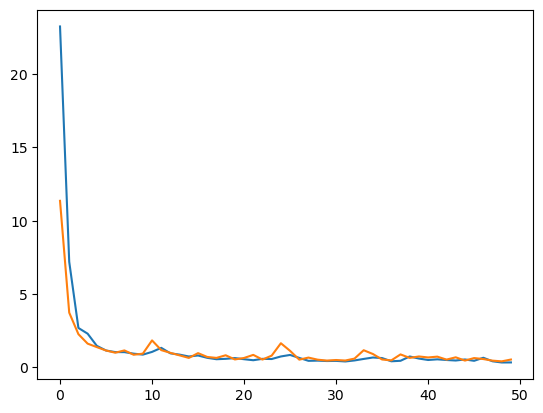

In [37]:
from utils import train
from torch.optim import AdamW
import torch.nn as nn
model = minimalGPT(1,100,10,1000)

#model,train_set,val_set,epochs,lr,optimizer,loss_fn,device
model, train_loss, val_loss = train(model, train_loader, val_loader, 50, 1e-3, AdamW, nn.MSELoss(), 'cuda')
plt.plot(train_loss)
plt.plot(val_loss)

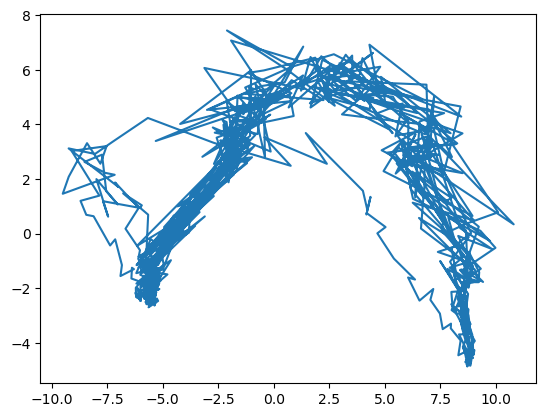

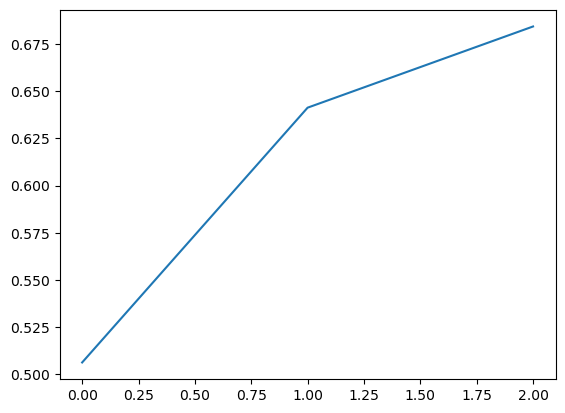

In [43]:
data = next(iter(train_loader))
data.shape
out,hidden = model(data)
hidden = hidden.detach().numpy().squeeze()
pca = PCA(n_components=3)
pca.fit(hidden)
hidden_pca = pca.transform(hidden)
plt.figure()
plt.plot(hidden_pca[:,0],hidden_pca[:,1])
plt.figure()
#plot evr
plt.plot(np.cumsum(pca.explained_variance_ratio_))